# Fitting Metcalfe's Law for Crypto Assets

According to [Metcalfe's Law](https://en.wikipedia.org/wiki/Metcalfe%27s_law) a value of networks is proportinal to the number of possible connection between their particpants. As each partcipant can have _n-1_ connection the value of the network, not cosidering the cost of the networkis :
> V=A*n*(n-1)/2

If n is large and K=A/2 :  

> V=K*n^2

The aim of this notebook is to back test is assumption. 

To change the coins, or the wallet constrains, change the __coins__ and __metrics__ arrays down below. 

The data is downloaded from [coinmetrics](https://charts.coinmetrics.io/formulas/) and saved to [data/wallets.csv]( https://github.com/bekisz/chaintelligence/data/wallets.csv)

In [1]:
import pandas as pd

fromDate = '2008-01-01'

df = pd.read_csv('data/wallets.csv', encoding = "utf-16", sep='\t')
df['Time']= pd.to_datetime(df['Time'])
df.set_index(['Time'],inplace=True, verify_integrity = True, drop = True)
df = df[fromDate:]
df.tail(2)

,BTC_Price,BTC_CapMrktCurUSD,BTC_CapRealUSD,BTC_AdrBal1in10BCnt,BTC_AdrBal1in1BCnt,BTC_AdrBal1in100MCnt,BTC_AdrBal1in10MCnt,BTC_AdrBalUSD10MCnt,BTC_AdrBalUSD1MCnt,BTC_AdrBalUSD100KCnt,...,SUSHI_AdrBal1in100MCnt,SUSHI_AdrBal1in10MCnt,SUSHI_AdrBal1in1MCnt,SUSHI_AdrBalUSD10MCnt,SUSHI_AdrBalUSD1MCnt,SUSHI_AdrBalUSD100KCnt,SUSHI_AdrBalUSD10KCnt,SUSHI_AdrBalUSD1KCnt,SUSHI_AdrBalUSD100Cnt,SUSHI_AdrBalUSD10Cnt
Time,,,,,,,,,,,,,,,,,,,,,
2023-01-01,16920.747388,3.254967e+11,3.840831e+11,18483496.5,8.624333e+06,2.843057e+06,537943.166667,3791.3,24067.833333,216441.033333,...,65036.433333,33802.900000,7280.466667,4.033333,35.1,192.333333,565.333333,2729.133333,16138.833333,47365.200000
2023-01-02,16913.721117,3.253766e+11,3.838558e+11,18485245.0,8.631498e+06,2.845133e+06,538275.300000,3789.2,24074.633333,216506.766667,...,65096.800000,33849.866667,7300.433333,3.966667,34.3,191.500000,562.000000,2711.966667,16026.766667,47237.966667


In [2]:

# ---  Coins to Analyze ----
# all
coins = ['YFI','ZEC','ETH','ADA','ETC','LTC', 'BTC','MKR', 'BTG',"AAVE","MATICETH", "MANA", "UNI", "COMP","BAL","BAT", "SUSHI", "DOGE","1INCH", 'LINK']

#coins = [ 'BTC','ADA', 'ETH','MKR','LTC', 'ETC','LINK','ALGO','XRP', 'XLM', 'AAVE']

# ---------------------------------------------------------------------
# Wallets over x USDs : 
#metrics = ['AdrBalUSD1MCnt','AdrBalUSD10KCnt', 'AdrBalUSD1KCnt', 'AdrBalUSD100Cnt'] 
# Wallets over nth of total coins : 
# metrics = ['AdrBal1in10BCnt','AdrBal1in1BCnt', 'AdrBal1in100MCnt', 'AdrBal1in10MCnt']

# A good enough commitment is to hold at least 1000 USD 
metrics = ['AdrBalUSD100Cnt'] 
#metrics = ['AdrBal1in100MCnt'] 

#metrics = ['AdrBalUSD100Cnt', 'AdrBalUSD1KCnt','AdrBalUSD10KCnt'] 
#metrics = ['AdrBalUSD10KCnt'] 



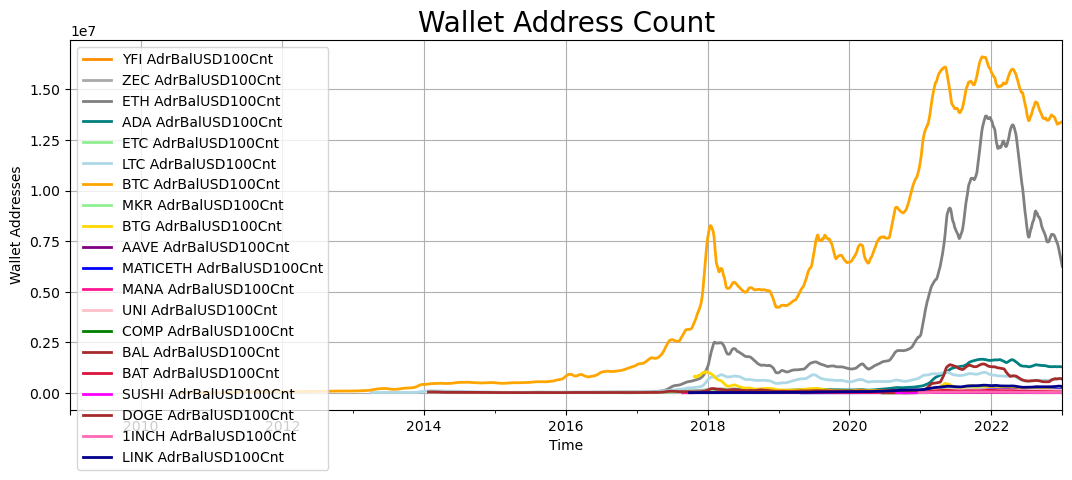

In [3]:
import matplotlib.pyplot as plt

metric_linestyles = {
    'AdrBal1in10BCnt':'-',
    'AdrBal1in1BCnt':'--',
    'AdrBal1in100MCnt':'-.',    
    'AdrBal1in10MCnt':':',    
    'AdrBalUSD1MCnt':':',
    'AdrBalUSD10KCnt':'-.',
    'AdrBalUSD1KCnt':'--',    
    'AdrBalUSD100Cnt':'-',       
}
coin_colors = {
    'BTC':'orange',
    'ETH':'grey',
    'AAVE':'purple',
    'LTC':'lightblue',
    'MKR':'lightgreen',
    'MATICETH':'blue',
    'BAL':'brown',
    'CRV': 'red',
    'ETC' : 'lightgreen',
    'ADA':'teal',
    'LINK' : 'darkblue',
    'XRP' : 'black',
    'XLM' : 'grey',
    'ALGO' : 'green',
    'BTG' : 'gold',
    'BAL' : 'brown',
    'SUSHI': 'magenta',
    'COMP' : 'green',
    'DOGE': 'brown',
    'BAT': 'crimson',
    'MANA': 'deeppink',
    '1INCH': 'hotpink',
    'ZEC': 'darkgrey',
    'YFI' : 'darkorange',
    'UNI': 'pink'
    
}
coin_max_supply = {
    'BTC': 21000000,
    'ETH': 122373866, # total supply as of 2023.01.01
    'AAVE':16000000,
    'LTC': 84000000,
    'MKR': 1005577,
    'MATICETH': 10000000000, # MATIC on ETH chan only
    'UNI':1000000000,
    'LDO':1000000000,
    'BAL': 96150704,
    'CRV': 3303030299,
    'ETC' : 210000000,
    'ADA': 45000000000,
    'BIFI' :80000,
    'LINK' : 1000000000,
    'XRP' : 100* 1000000000,
    'XLM' : 50001806812,
    'ALGO' : 10*1000000000,
    'BTG' : 21000000,
    'SUSHI': 250000000,
    'COMP' : 10000000,
    'DOGE': 132670764300, # total supply as of 2023.01.01
    'BAT': 1500000000,
    'MANA': 2193539027, # total supply as of 2023.01.01
    '1INCH': 1500000000,
    'ZEC': 21000000,
    'YFI' : 36666
    
}

F = plt.gcf()
DefaultSize = F.get_size_inches()

plt.title("Wallet Address Count", fontsize=20)
plt.ylabel("Wallet Addresses")
for metric in metrics:
    for coin in coins: 
        df[coin + '_' + metric].plot(c=coin_colors[coin],label=coin + ' ' + metric,linewidth=2, ls = metric_linestyles[metric])

plt.grid()
plt.legend(loc='upper left')
#plt.ylim((0,25000))
F.set_size_inches( (DefaultSize[0]*2, DefaultSize[1]*1) )


In [4]:
def convert_to_m2(df,dt):
    iloc_idx = df.index.get_indexer([dt], method='nearest')  # returns absolute index into df e.g. array([5])
    loc_idx = df.index[iloc_idx]                             # if you want named index
    # my_val = df.iloc[iloc_idx]
    return df.loc[loc_idx,'WM2NS'].values[0] 
df_m2 = pd.read_csv('data/WM2NS.csv')
df_m2['DATE']= pd.to_datetime(df_m2['DATE'])
df_m2.set_index(['DATE'],inplace=True, verify_integrity = True, drop = True)
df.loc(axis=1)[('USD_m2_supply')] = df.index.map(lambda dt: convert_to_m2(df_m2,dt))

btc_birthday = pd.to_datetime('2009-01-03')
m2_supply_at_genesis = convert_to_m2(df_m2,btc_birthday)
df.loc(axis=1)[('USD_m2_supply_index')] = df.loc(axis=1)[('USD_m2_supply')]/m2_supply_at_genesis


for coin in coins:
    df.loc(axis=1)[(coin+'_Price_m2')] = df.loc(axis=1)[(coin+'_Price')] /df.loc(axis=1)[('USD_m2_supply_index')]
    df.loc(axis=1)[(coin+'_CapMrktCurUSD_m2')] = df.loc(axis=1)[(coin+'_CapMrktCurUSD')] /df.loc(axis=1)[('USD_m2_supply_index')]
    df.loc(axis=1)[(coin+'_CapRealUSD_m2')] = df.loc(axis=1)[(coin+'_CapRealUSD')] /df.loc(axis=1)[('USD_m2_supply_index')]
    df.loc(axis=1)[(coin+'_CapFDMC_m2')] = coin_max_supply[coin] *df.loc(axis=1)[(coin+'_Price')] /df.loc(axis=1)[('USD_m2_supply_index')]

df.head(2)


,BTC_Price,BTC_CapMrktCurUSD,BTC_CapRealUSD,BTC_AdrBal1in10BCnt,BTC_AdrBal1in1BCnt,BTC_AdrBal1in100MCnt,BTC_AdrBal1in10MCnt,BTC_AdrBalUSD10MCnt,BTC_AdrBalUSD1MCnt,BTC_AdrBalUSD100KCnt,...,DOGE_CapRealUSD_m2,DOGE_CapFDMC_m2,1INCH_Price_m2,1INCH_CapMrktCurUSD_m2,1INCH_CapRealUSD_m2,1INCH_CapFDMC_m2,LINK_Price_m2,LINK_CapMrktCurUSD_m2,LINK_CapRealUSD_m2,LINK_CapFDMC_m2
Time,,,,,,,,,,,,,,,,,,,,,
2009-01-03,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-04,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


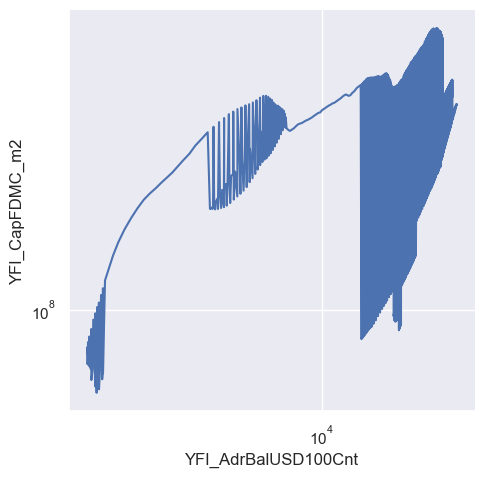

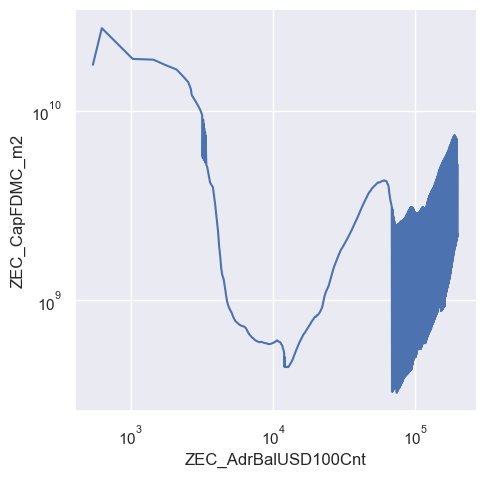

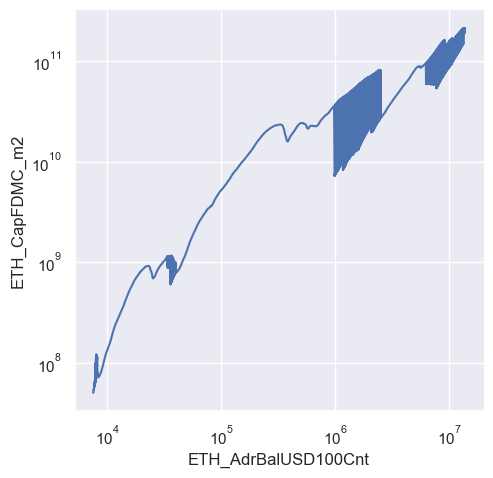

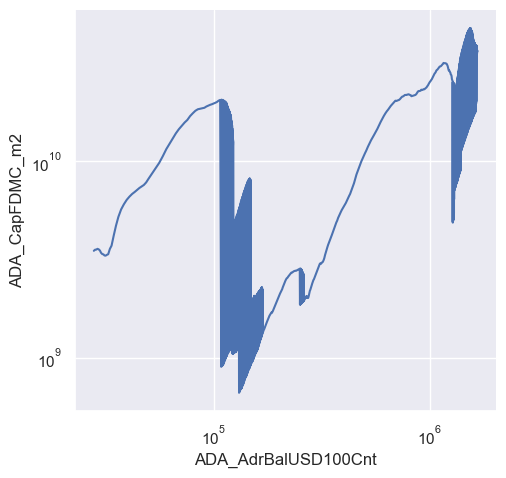

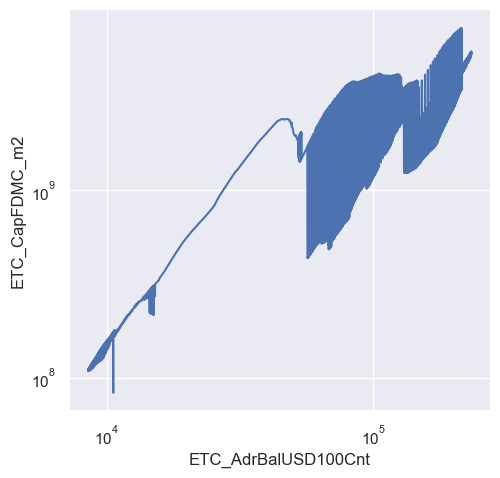

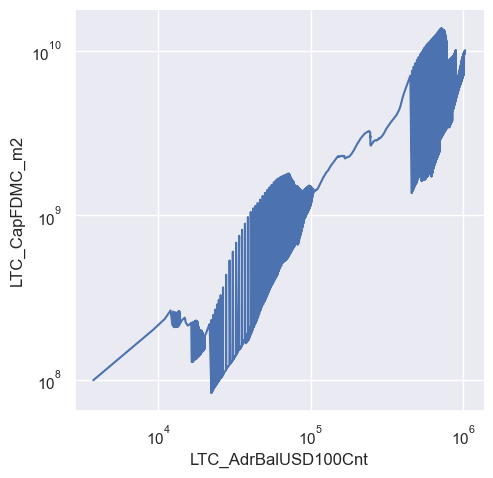

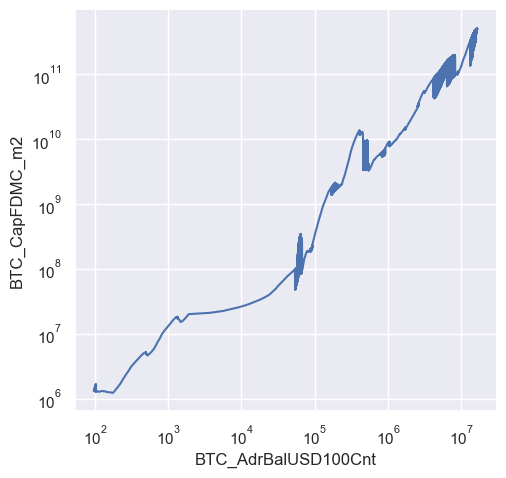

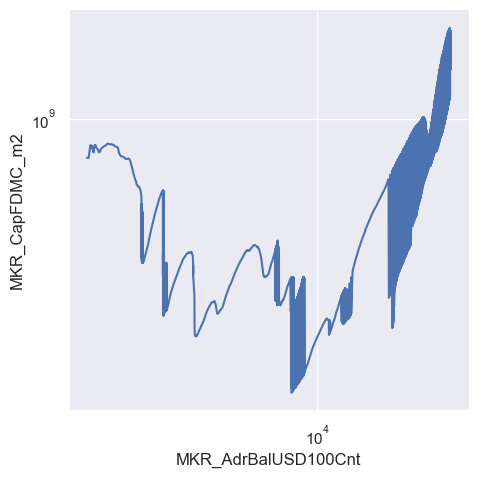

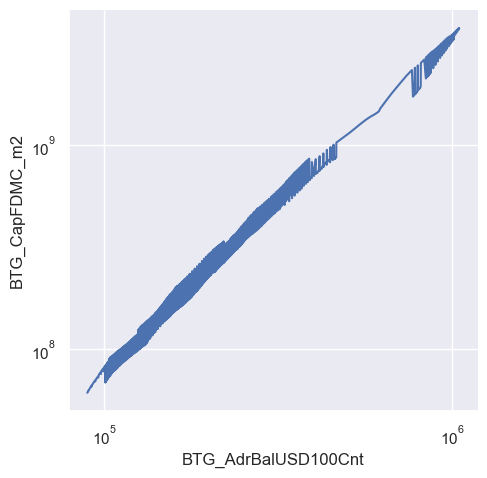

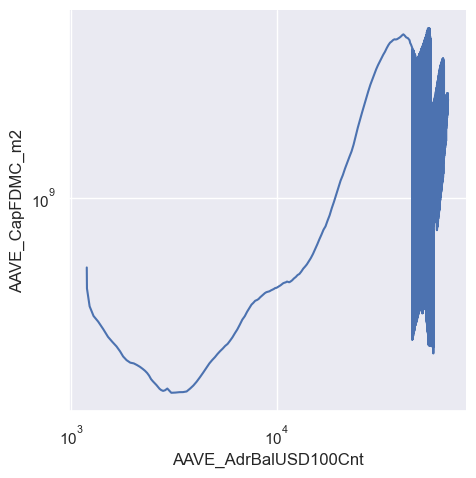

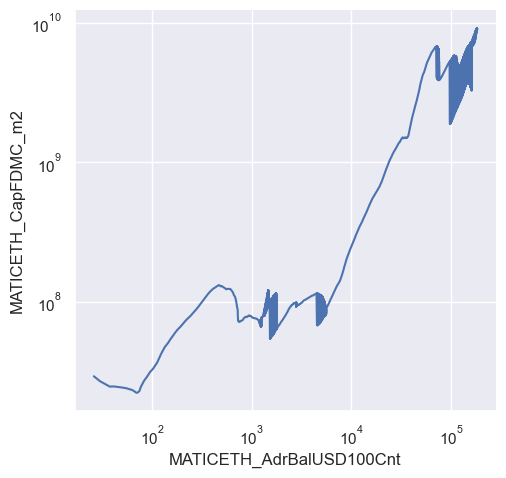

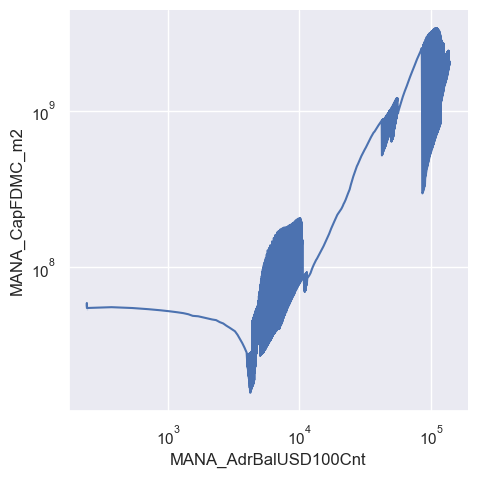

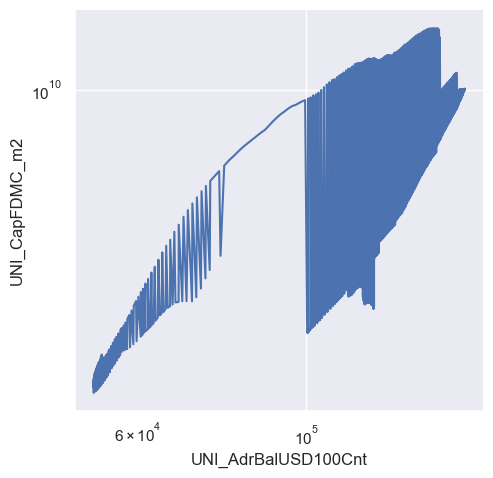

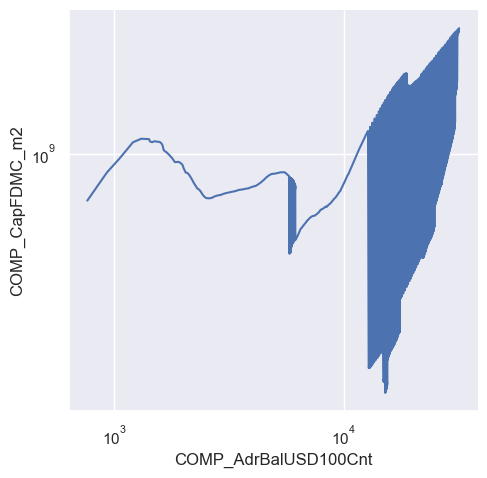

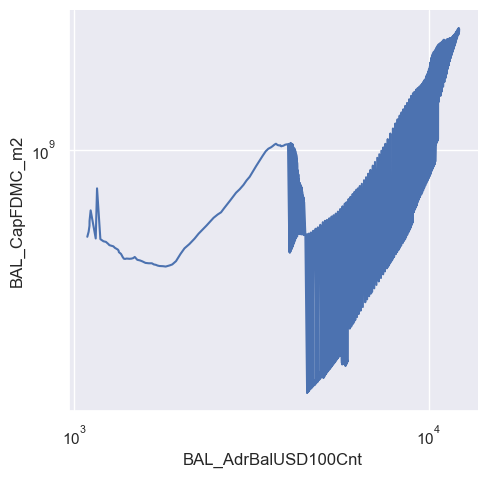

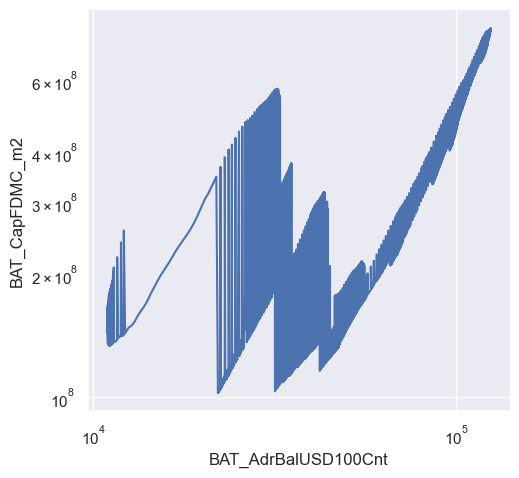

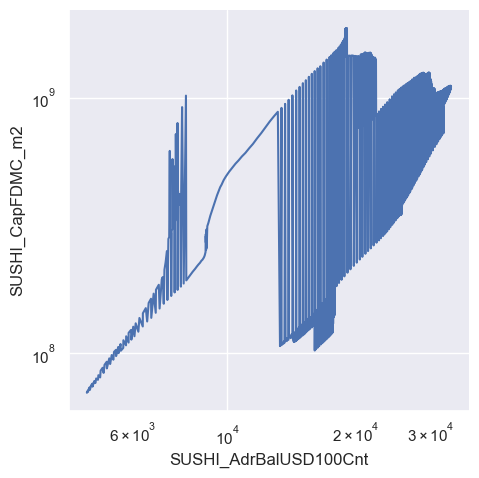

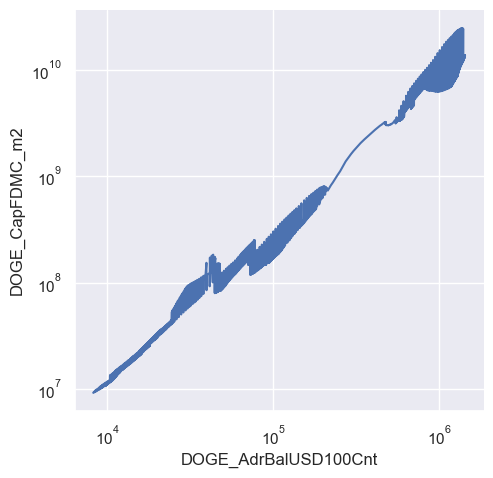

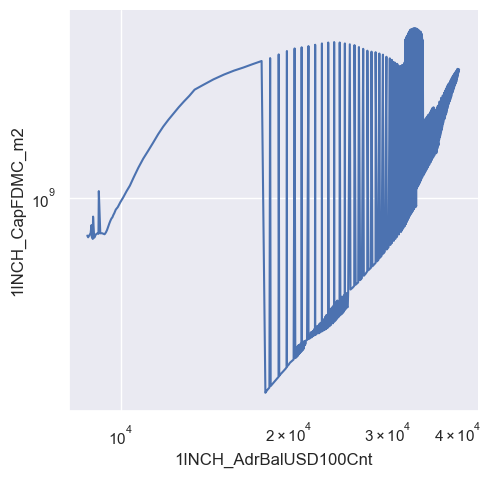

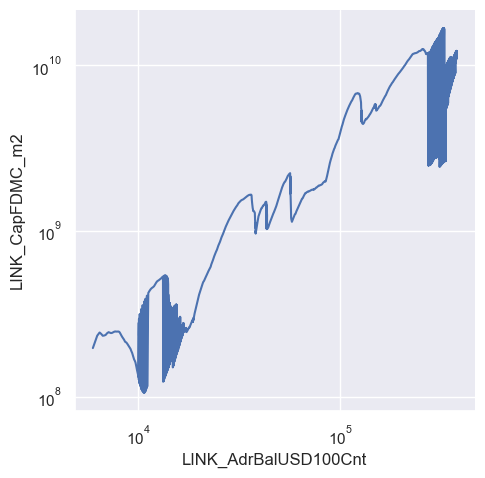

In [5]:
# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()

# Load an example dataset
#tips = sns.load_dataset("tips")

# Create a visualization
for coin in coins: 
    sns.relplot(
        data=df,
        x=coin+"_" + metric, y=coin + "_CapFDMC_m2", kind="line")
    plt.xscale('log')
    plt.yscale('log')

#

In [6]:

import math
import numpy as np
def quadratic_growth(n,p_0,k):
    return k*n*n
def n_log_n_growth(n,p_0,k):
    return k*n*np.log2(n)

def limited_growth_function_log(t,p_0,k,l):
    return np.log2(l*p_0/( (l-p_0)*(math.e ** (-k*t))+p_0))
def limited_growth_function(t,p_0,k,l):
    return l*p_0/( (l-p_0)*(math.e ** (-k*t))+p_0)
def limited_growth_function_log(t,p_0,k,l):
    return np.log2(l*p_0/( (l-p_0)*(math.e ** (-k*t))+p_0))